# Basic Plotting

In [1]:
import pandas as pd
import geopandas 


In [2]:
df_waterstress = pd.read_csv('clean data/water_stress.csv')
df_waterstress.head()

,Unnamed: 0,Country,Water stress (MDG),Water use efficiency (SDG),Water stress (SDG)
0,0,AFG,31.045462,0.923778,54.757019
1,1,AGO,0.475539,142.467836,1.871883
2,2,ALB,3.933775,6.656907,7.139423
3,3,ARE,1708.000000,92.773763,1708.000000
4,4,ARG,4.301333,13.616564,10.456664


In [3]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))[['iso_a3','geometry']]

In [4]:
world.head()

,iso_a3,geometry
0,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,ESH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [5]:
merged = world.merge(df_waterstress, left_on='iso_a3', right_on='Country')
merged

,iso_a3,geometry,Unnamed: 0,Country,Water stress (MDG),Water use efficiency (SDG),Water stress (SDG)
0,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",55,FJI,0.297373,40.949707,0.297373
1,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",167,TZA,5.384855,6.915170,12.963241
2,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",27,CAN,1.231220,41.689695,3.679712
3,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",171,USA,14.480160,42.378501,28.161984
4,KAZ,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",84,KAZ,20.708422,7.135540,31.137309
...,...,...,...,...,...,...,...
157,MKD,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",106,MKD,16.312500,10.173425,25.266215
158,SRB,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",148,SRB,3.315043,5.911266,6.059957
159,MNE,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",110,MNE,NaN,20.848901,NaN
160,TTO,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",164,TTO,8.755208,58.575578,20.326481


In [6]:
colors = 9
cmap = 'Reds'
figsize = (16, 10)
year = "2012-2017"

ax = merged.dropna().plot(column='''Water stress (MDG)''', cmap=cmap, figsize=figsize, scheme='equal_interval', k=colors, legend=True)


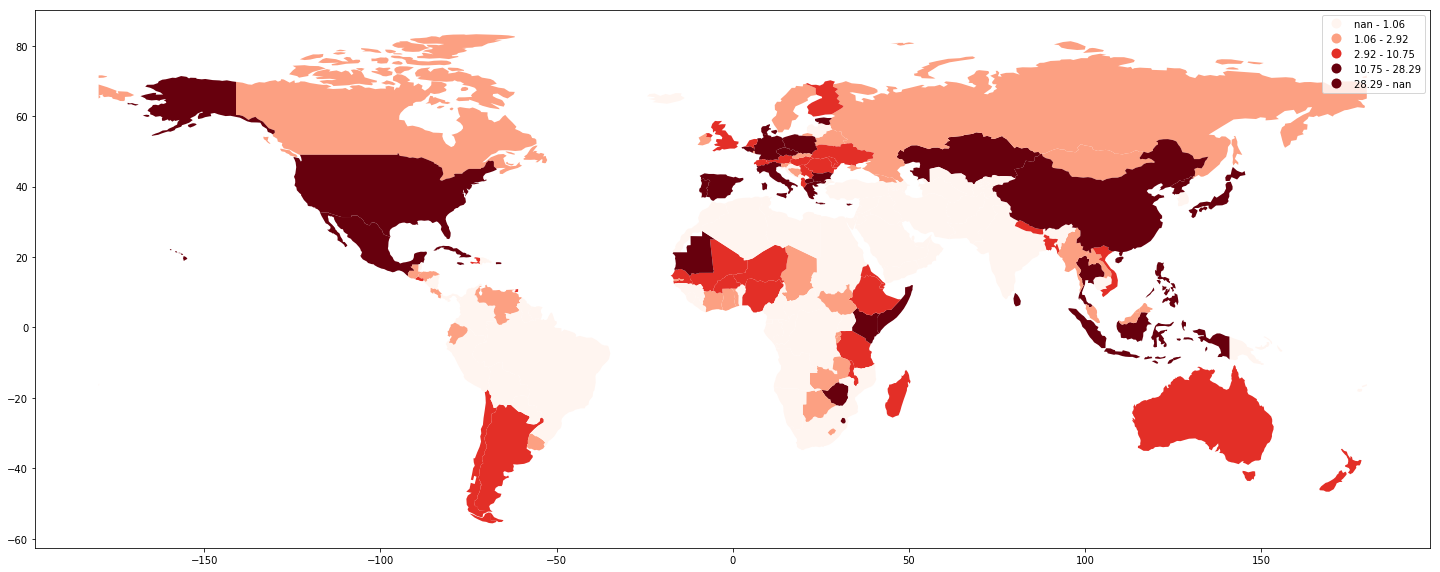

In [9]:
merged.plot(column='''Water stress (MDG)''',
           figsize=(25, 20), scheme = 'QUANTILES',
           legend=True,cmap='Reds')

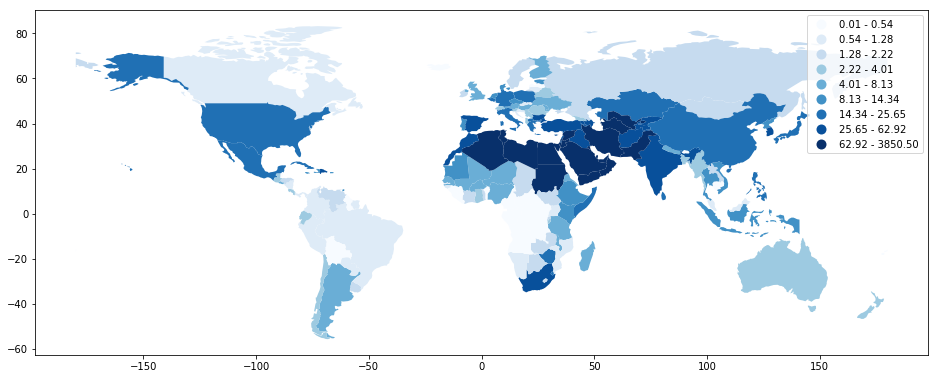

In [21]:
colors = 9
cmap = 'Blues'
figsize = (16, 10)
year = '2012-2017'
title = 'Individuals using the Internet (% of population) in {}'.format(year)

ax = merged.dropna().plot(column='''Water stress (MDG)''', cmap=cmap, figsize=figsize, scheme='quantiles', k=colors, legend=True)
ax.set_title(title, fontdict={'fontsize': 20}, loc='left')


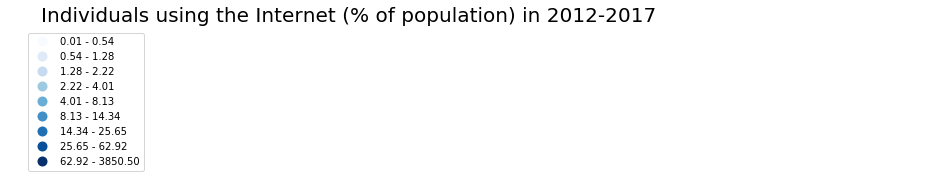

In [20]:
ax.set_title(title, fontdict={'fontsize': 20}, loc='left')

ax.set_axis_off()
ax.set_xlim([-1.5e7, 1.7e7])
ax.get_legend().set_bbox_to_anchor((.12, .4))
ax.get_figure()

In [19]:
merged[merged['''Water stress (MDG)'''].isna()]

,iso_a3,geometry,Unnamed: 0,Country,Water stress (MDG),Water use efficiency (SDG),Water stress (SDG)
159,MNE,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",110,MNE,NaN,20.848901,NaN
